**GROUNDNUT YIELD PREDICTION **

In [120]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# creating dataframe
df = pd.read_csv("/content/drive/MyDrive/Final_Data_update.csv")

In [123]:
# printing first five rows
df.head()


,Year,District,Area_,Area,Production_,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
0,2000,Jamnagar,"3,91,300.00",3.91,"9,100.00",0.91,0.02,0.279311,0.185789,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
1,2000,Junagadh,"4,06,300.00",4.06,"4,14,800.00",41.48,1.02,0.362143,0.242622,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
2,2000,Rajkot,"3,81,100.00",3.81,"21,600.00",2.16,0.06,0.283901,0.179621,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620
3,2000,Amreli,"2,47,600.00",2.48,"42,100.00",4.21,0.17,0.270095,0.164502,2.809569,13.959410,0.611284,61.553972,255.450975,8.357046
4,2000,Bhavnagar,"1,45,700.00",1.46,"13,100.00",1.31,0.09,0.272157,0.172519,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608


In [124]:
# size of dataframe
df.shape

(110, 15)

In [125]:
# dropping unnessary columns
df = df.drop("Area_" ,axis=1)
df = df.drop("District" ,axis=1)
df = df.drop("Production_" ,axis=1)
df.head()

,Year,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
0,2000,3.91,0.91,0.02,0.279311,0.185789,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
1,2000,4.06,41.48,1.02,0.362143,0.242622,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
2,2000,3.81,2.16,0.06,0.283901,0.179621,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620
3,2000,2.48,4.21,0.17,0.270095,0.164502,2.809569,13.959410,0.611284,61.553972,255.450975,8.357046
4,2000,1.46,1.31,0.09,0.272157,0.172519,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608


In [127]:
# Encode categorical features if any
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

In [128]:
df.describe()

,Year,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,2010.500000,2.553273,37.937000,1.531091,0.384077,0.258350,2.780308,14.111184,0.600969,62.823229,255.060254,8.948063
std,6.373325,1.192883,29.601946,0.904541,0.055993,0.042436,0.239229,1.831773,0.067863,7.279185,4.818607,2.341461
min,2000.000000,0.640000,0.720000,0.020000,0.224283,0.140091,2.432149,12.628797,0.507552,53.799029,247.339524,7.129536
25%,2005.000000,1.360000,15.430000,0.915000,0.345665,0.232442,2.730903,13.137282,0.580709,58.791410,252.555656,7.433608
50%,2010.500000,2.560000,33.955000,1.570000,0.383579,0.257656,2.750900,13.173069,0.588492,61.553972,255.450975,8.310620
75%,2016.000000,3.792500,54.717500,2.072500,0.421065,0.289042,2.809569,13.959410,0.611284,64.480657,259.409928,8.357046
max,2021.000000,4.580000,137.970000,3.830000,0.514367,0.344195,3.178018,17.657363,0.716806,75.491077,260.545185,13.509504


In [129]:
# cheacking for missing values
df.isnull().sum()

,0
Year,0
Area,0
Production,0
Yield_(tonnes/ha),0
NDVI,0
EVI,0
FAPAR,0
GPP,0
LAI,0
Rainfall,0


In [130]:
# cheaking datatype of each column
df.info()
# finding the correlation among features
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               110 non-null    int64  
 1   Area               110 non-null    float64
 2   Production         110 non-null    float64
 3   Yield_(tonnes/ha)  110 non-null    float64
 4   NDVI               110 non-null    float64
 5   EVI                110 non-null    float64
 6   FAPAR              110 non-null    float64
 7   GPP                110 non-null    float64
 8   LAI                110 non-null    float64
 9   Rainfall           110 non-null    float64
 10  Temperature        110 non-null    float64
 11  SMI                110 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 10.4 KB


,Year,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
Year,1.000000e+00,-0.524191,-0.008389,0.430776,0.356447,0.259767,2.563615e-15,-1.194923e-15,7.064895e-17,-1.929236e-15,-4.139146e-17,4.390124e-16
Area,-5.241907e-01,1.000000,0.537603,-0.106882,-0.004436,0.071298,1.381353e-01,2.770594e-01,1.491532e-01,6.393068e-02,7.389554e-02,1.553900e-01
Production,-8.389075e-03,0.537603,1.000000,0.701395,0.438330,0.523469,1.454471e-01,2.736771e-01,1.561524e-01,1.252117e-01,-4.167075e-02,9.411860e-02
Yield_(tonnes/ha),4.307757e-01,-0.106882,0.701395,1.000000,0.540551,0.567718,1.096581e-02,6.938077e-02,1.495869e-02,4.428831e-02,-4.684835e-02,4.658768e-02
NDVI,3.564466e-01,-0.004436,0.438330,0.540551,1.000000,0.974191,4.938919e-01,4.304352e-01,4.969318e-01,4.727727e-01,-4.534724e-01,-3.910564e-01
EVI,2.597673e-01,0.071298,0.523469,0.567718,0.974191,1.000000,5.289337e-01,5.031817e-01,5.353577e-01,5.266492e-01,-5.075875e-01,-3.783005e-01
FAPAR,2.563615e-15,0.138135,0.145447,0.010966,0.493892,0.528934,1.000000e+00,8.449018e-01,9.978561e-01,9.612313e-01,-8.947194e-01,-8.116778e-01
GPP,-1.194923e-15,0.277059,0.273677,0.069381,0.430435,0.503182,8.449018e-01,1.000000e+00,8.752019e-01,8.770930e-01,-8.367502e-01,-3.867457e-01
LAI,7.064895e-17,0.149153,0.156152,0.014959,0.496932,0.535358,9.978561e-01,8.752019e-01,1.000000e+00,9.635767e-01,-9.008845e-01,-7.761713e-01
Rainfall,-1.929236e-15,0.063931,0.125212,0.044288,0.472773,0.526649,9.612313e-01,8.770930e-01,9.635767e-01,1.000000e+00,-9.752740e-01,-7.506678e-01


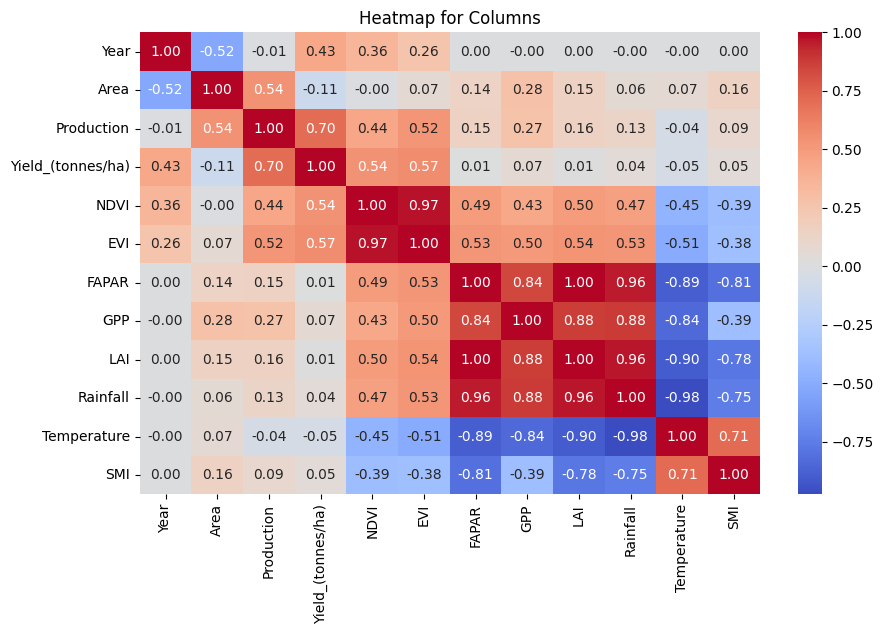

In [131]:
# heatmap
def create_heatmap(data):
    plt.figure(figsize=(10,6))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap for Columns')
    plt.show()

create_heatmap(df)

In [132]:
# extrating year and production column
year = df["Year"]
production = df["Production"]

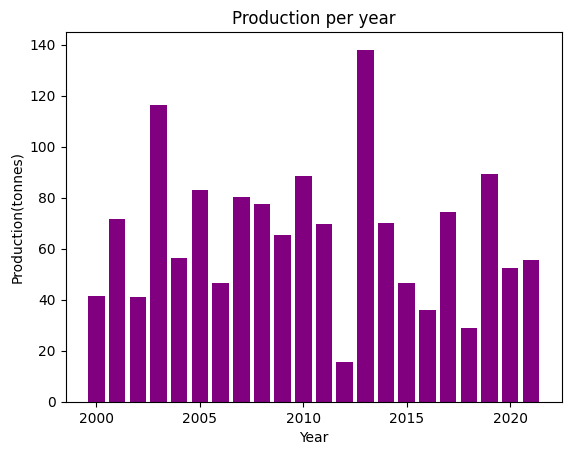

In [133]:
# anlaysing the the production per year
# plotting the bar graph
plt.bar(year , production,color = 'purple')
plt.xlabel("Year")
plt.ylabel('Production(tonnes)')
plt.title("Production per year")
plt.show()

In [134]:
# calculating standered deviation for data prerocessing
df.std()

,0
Year,6.373325
Area,1.192883
Production,29.601946
Yield_(tonnes/ha),0.904541
NDVI,0.055993
EVI,0.042436
FAPAR,0.239229
GPP,1.831773
LAI,0.067863
Rainfall,7.279185


In [135]:
# standeredisation
x = df.drop("Yield_(tonnes/ha)",axis=1)
y = df["Yield_(tonnes/ha)"]
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [136]:
#rechecking standard deviation
x.std()

np.float64(1.0)

**TRAINING THE MODELS **

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [139]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "SVR": SVR(kernel='rbf', C=10, gamma=0.1),
    "XGBoost": XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2


In [140]:
# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R2 Score']).sort_values(by='R2 Score', ascending=False)
print(results_df)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
from sklearn.ensemble import RandomForestRegressor
grid_search = RandomizedSearchCV(XGBRegressor(random_state=42), param_grid, cv=5, n_iter=20, scoring='r2', verbose=2, n_jobs=-1, random_state=42)
grid_search.fit(x_train, y_train)

                   R2 Score
SVR                0.955582
Decision Tree      0.890873
XGBoost            0.882212
Random Forest      0.835852
Lasso Regression   0.772004
Ridge Regression   0.769637
Linear Regression  0.749976
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [141]:
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
final_r2_xgb = r2_score(y_test, y_pred_xgb)
print("Optimized XGBoost R2 Score:", final_r2_xgb)

Optimized XGBoost R2 Score: 0.8911872736422752


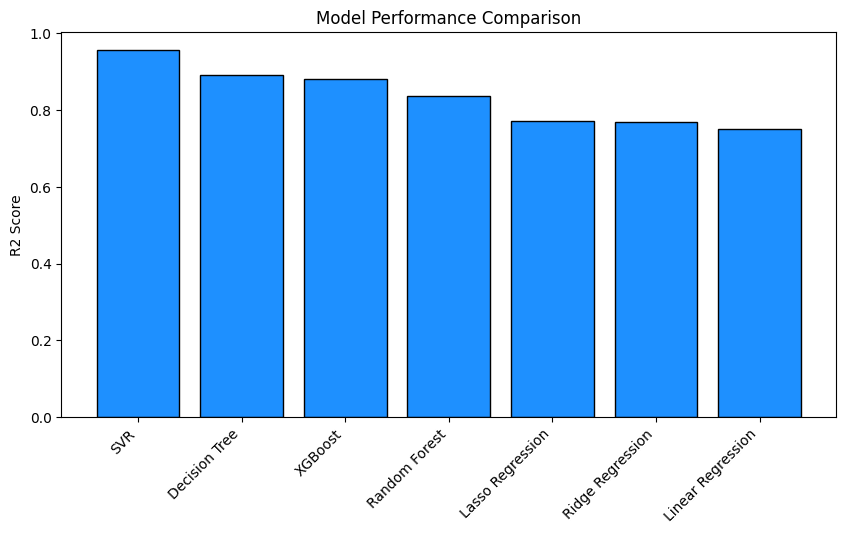

In [142]:
# Plot results
plt.figure(figsize=(10,5))
plt.bar(results_df.index, results_df['R2 Score'], color='dodgerblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R2 Score')
plt.title('Model Performance Comparison')
plt.show()